In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage
import cv2
from skimage.color import rgb2gray

In [5]:
slika2 = cv2.imread('./maska.png')
slika = cv2.imread('./vhod.png')

In [3]:
def iskalnik_4_kotnikov(img: np.ndarray) -> list[np.ndarray]:
    # Check if the image is truly grayscale (all channels are identical or single-channel)
    if len(img.shape) == 2 or (len(img.shape) == 3 and np.allclose(img[:, :, 0], img[:, :, 1]) and np.allclose(img[:, :, 1], img[:, :, 2])):
        print("Processing a black-and-white image...")
        # Load as grayscale
        img_gray = img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Threshold the image to isolate white shapes
        _, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

        # Use the mask to preserve only white shapes
        result = cv2.bitwise_and(img_gray, img_gray, mask=mask)

    else:  # Colored image
        print("Processing a colorful image...")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Define gray background thresholds in HSV
        lower_gray = np.array([0, 0, 100])  # Adjust as needed
        upper_gray = np.array([180, 50, 255])

        # Create a mask for the gray background
        mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

        # Invert the mask to get colorful shapes
        mask_inv = cv2.bitwise_not(mask)

        # Use the mask to keep only the colorful shapes
        result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

    # Convert the result to grayscale for further processing
    if len(result.shape) == 3:  # Color image
        slika = result.mean(2)
    else:  # Grayscale image
        slika = result
        
    T1=0.4
    T2=0.7
    maska_s1 = slika < T1
    maska_s3 = slika > T2
    contours, _ = cv2.findContours(np.uint8(maska_s3), mode=cv2.RETR_LIST,method=cv2.CHAIN_APPROX_NONE)
    contours_large = [c for c in contours if cv2.contourArea(c, False)>100.]
    contours_neg_orient = [c for c in contours_large if cv2.contourArea(c, True)<0.]
    contours_approx = [cv2.approxPolyDP(c, 2., True) for c in contours_neg_orient]
    rectangular_contours = [c for c in contours_approx if len(c) == 4]
    # Generate a list of 4x2 corner coordinates for rectangular contours
    corner_coordinates = [np.array([[pt[1], pt[0]] for pt in c[:, 0]]) for c in rectangular_contours]

    return corner_coordinates

In [6]:
iskalnik_4_kotnikov(slika)

Processing a colorful image...


[array([[193, 181],
        [240, 175],
        [244, 226],
        [203, 218]], dtype=int32),
 array([[184,  84],
        [235,  74],
        [234, 120],
        [193, 121]], dtype=int32),
 array([[104,  31],
        [147,   8],
        [177,  29],
        [123,  65]], dtype=int32),
 array([[ 91, 205],
        [138, 183],
        [152, 212],
        [118, 238]], dtype=int32),
 array([[ 35, 156],
        [ 74, 143],
        [ 89, 193],
        [ 39, 203]], dtype=int32),
 array([[ 13, 107],
        [ 34,  66],
        [ 73,  80],
        [ 54, 120]], dtype=int32)]

In [12]:
iskalnik_4_kotnikov(slika2)

Processing a black-and-white image...


[array([[194, 181],
        [239, 175],
        [243, 226],
        [203, 217]], dtype=int32),
 array([[185,  84],
        [234,  75],
        [233, 120],
        [193, 120]], dtype=int32),
 array([[ 91, 206],
        [138, 184],
        [151, 212],
        [119, 238]], dtype=int32),
 array([[ 36, 156],
        [ 74, 144],
        [ 88, 193],
        [ 39, 203]], dtype=int32),
 array([[ 14, 107],
        [ 35,  66],
        [ 72,  80],
        [ 53, 120]], dtype=int32)]

# GRAFIČNA PRIMERJAVA

In [13]:
from skimage.measure import find_contours
from skimage.draw import polygon2mask

In [14]:
image = plt.imread('./vhod.png')
mask_target = plt.imread('./maska.png')[:, :, 0]

In [15]:
target_contours = find_contours(mask_target, 0.5)

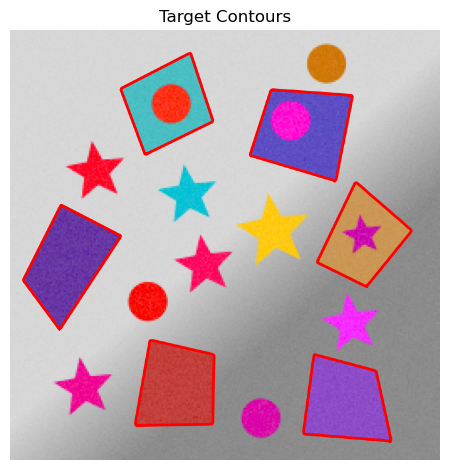

In [16]:
# Create a new figure
fig, ax = plt.subplots()

# Display the image (optional, can be omitted if you only want the contours)
ax.imshow(image)

# Plot each contour on top of the image
for contour in target_contours:
    ax.plot(contour[:, 1], contour[:, 0], color='r', lw=2)  # Red contours with line width 2

# Optionally, add a title and other settings
ax.set_title('Target Contours')
ax.set_axis_off()  # Hide the axis for better visualization

# Show the plot
plt.tight_layout()
plt.show()

## chat plot kjer so povezane konture

In [34]:
detected_konture = iskalnik_4_kotnikov(slika)

Processing a colorful image...


In [35]:
detected_konture

[array([[193, 181],
        [240, 175],
        [244, 226],
        [203, 218]], dtype=int32),
 array([[184,  84],
        [235,  74],
        [234, 120],
        [193, 121]], dtype=int32),
 array([[104,  31],
        [147,   8],
        [177,  29],
        [123,  65]], dtype=int32),
 array([[ 91, 205],
        [138, 183],
        [152, 212],
        [118, 238]], dtype=int32),
 array([[ 35, 156],
        [ 74, 143],
        [ 89, 193],
        [ 39, 203]], dtype=int32),
 array([[ 13, 107],
        [ 34,  66],
        [ 73,  80],
        [ 54, 120]], dtype=int32)]

In [36]:
for contour in detected_konture:
    print(contour)

[[193 181]
 [240 175]
 [244 226]
 [203 218]]
[[184  84]
 [235  74]
 [234 120]
 [193 121]]
[[104  31]
 [147   8]
 [177  29]
 [123  65]]
[[ 91 205]
 [138 183]
 [152 212]
 [118 238]]
[[ 35 156]
 [ 74 143]
 [ 89 193]
 [ 39 203]]
[[ 13 107]
 [ 34  66]
 [ 73  80]
 [ 54 120]]


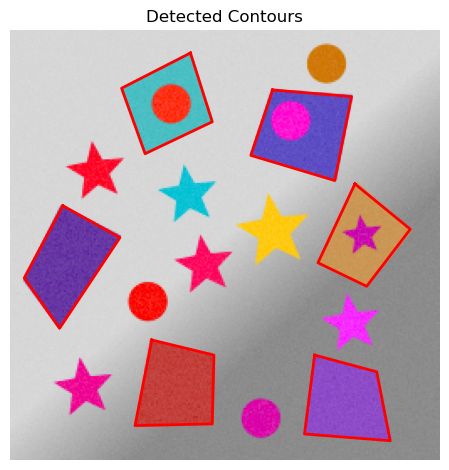

In [38]:
# Create a plot
fig, ax = plt.subplots()

# Show the image
ax.imshow(image)

# Plot each contour
for contour in detected_konture:
    if len(contour) == 4:  # Ensure it's a quadrilateral
        closed_contour = np.vstack([contour, contour[0]])  # Close the contour
        ax.plot(closed_contour[:, 1], closed_contour[:, 0], color='r', lw=2)  # Red contours

# Set titles and hide axes for better visualization
ax.set_title('Detected Contours')
ax.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()


## simple plot kjer niso povezane konture

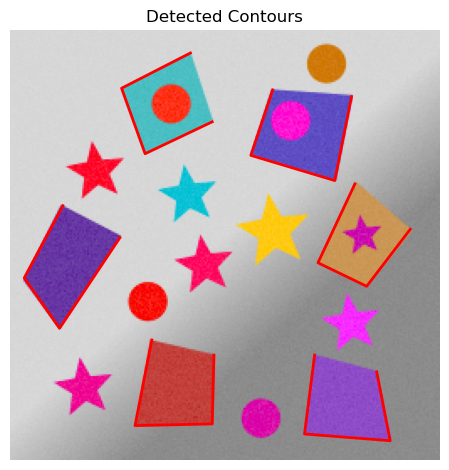

In [20]:
# Create a plot
fig, ax = plt.subplots()

# Show the image
ax.imshow(image)

# Plot each contour
for contour in detected_konture:
    ax.plot(contour[:, 1], contour[:, 0], color='r', lw=2)  # Red contours with line width 2

# Set titles and hide axes for better visualization
ax.set_title('Detected Contours')
ax.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()

# KONEC

this is my function for finding contours:
def iskalnik_4_kotnikov(img: np.ndarray) -> list[np.ndarray]:
    # Check if the image is truly grayscale (all channels are identical or single-channel)
    if len(img.shape) == 2 or (len(img.shape) == 3 and np.allclose(img[:, :, 0], img[:, :, 1]) and np.allclose(img[:, :, 1], img[:, :, 2])):
        print("Processing a black-and-white image...")
        # Load as grayscale
        img_gray = img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Threshold the image to isolate white shapes
        _, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

        # Use the mask to preserve only white shapes
        result = cv2.bitwise_and(img_gray, img_gray, mask=mask)

    else:  # Colored image
        print("Processing a colorful image...")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Define gray background thresholds in HSV
        lower_gray = np.array([0, 0, 100])  # Adjust as needed
        upper_gray = np.array([180, 50, 255])

        # Create a mask for the gray background
        mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

        # Invert the mask to get colorful shapes
        mask_inv = cv2.bitwise_not(mask)

        # Use the mask to keep only the colorful shapes
        result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

    # Convert the result to grayscale for further processing
    if len(result.shape) == 3:  # Color image
        slika = result.mean(2)
    else:  # Grayscale image
        slika = result
        
    T1=0.4
    T2=0.7
    maska_s1 = slika < T1
    maska_s3 = slika > T2
    contours, _ = cv2.findContours(np.uint8(maska_s3), mode=cv2.RETR_LIST,method=cv2.CHAIN_APPROX_NONE)
    contours_large = [c for c in contours if cv2.contourArea(c, False)>100.]
    contours_neg_orient = [c for c in contours_large if cv2.contourArea(c, True)<0.]
    contours_approx = [cv2.approxPolyDP(c, 2., True) for c in contours_neg_orient]
    rectangular_contours = [c for c in contours_approx if len(c) == 4]
    # Generate a list of 4x2 corner coordinates for rectangular contours
    corner_coordinates = [np.array([[pt[1], pt[0]] for pt in c[:, 0]]) for c in rectangular_contours]

    return corner_coordinates

focus on this part:
contours_approx = [cv2.approxPolyDP(c, 2., True) for c in contours_neg_orient]
rectangular_contours = [c for c in contours_approx if len(c) == 4]

cv2.approxPolyDP gives me contours with 4 corners but they aren't connected

# PROBA S FUKNCIJO FIND_CONTOURS

In [25]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Define gray background thresholds in HSV
lower_gray = np.array([0, 0, 100])  # Adjust as needed
upper_gray = np.array([180, 50, 255])

        # Create a mask for the gray background
mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

        # Invert the mask to get colorful shapes
mask_inv = cv2.bitwise_not(mask)

        # Use the mask to keep only the colorful shapes
result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

    # Convert the result to grayscale for further processing
if len(result.shape) == 3:  # Color image
    slika = result.mean(2)
else:  # Grayscale image
    slika = result

T1=0.4
T2=0.7
maska_s1 = slika < T1
maska_s3 = slika > T2

In [26]:
iskane_contours = find_contours(maska_s3, 0.5)

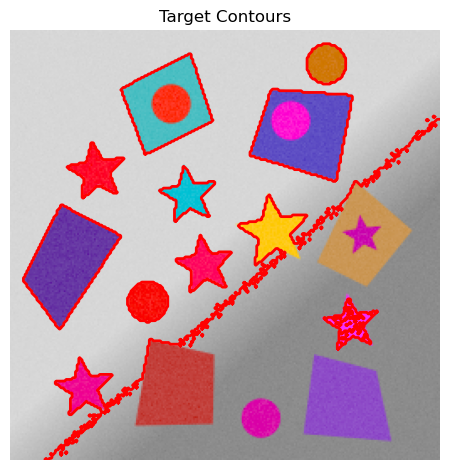

In [27]:
# Create a new figure
fig, ax = plt.subplots()

# Display the image (optional, can be omitted if you only want the contours)
ax.imshow(image)

# Plot each contour on top of the image
for contour in iskane_contours:
    ax.plot(contour[:, 1], contour[:, 0], color='r', lw=2)  # Red contours with line width 2

# Optionally, add a title and other settings
ax.set_title('Target Contours')
ax.set_axis_off()  # Hide the axis for better visualization

# Show the plot
plt.tight_layout()
plt.show()

In [2]:
img = plt.imread("./vhod.png")
img.dtype

dtype('float32')

In [4]:
iskalnik_4_kotnikov(img)

Processing a colorful image...


[]

# PRAVILNA FUNKCIJA

In [7]:
def iskalnik_4_kotnikov_dva(img: np.ndarray) -> list[np.ndarray]:
    # Normalize image to uint8 if it's in float32 format
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)
    elif img.dtype != np.uint8:
        raise ValueError("Unsupported image data type. Please provide an image of type uint8 or float32/float64.")

    # Check if the image is truly grayscale (all channels are identical or single-channel)
    if len(img.shape) == 2 or (len(img.shape) == 3 and np.allclose(img[:, :, 0], img[:, :, 1]) and np.allclose(img[:, :, 1], img[:, :, 2])):
        print("Processing a black-and-white image...")
        # Load as grayscale
        img_gray = img if len(img.shape) == 2 else cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Threshold the image to isolate white shapes
        _, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

        # Use the mask to preserve only white shapes
        result = cv2.bitwise_and(img_gray, img_gray, mask=mask)

    else:  # Colored image
        print("Processing a colorful image...")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Define gray background thresholds in HSV
        lower_gray = np.array([0, 0, 100])  # Adjust as needed
        upper_gray = np.array([180, 50, 255])

        # Create a mask for the gray background
        mask = cv2.inRange(img_hsv, lower_gray, upper_gray)

        # Invert the mask to get colorful shapes
        mask_inv = cv2.bitwise_not(mask)

        # Use the mask to keep only the colorful shapes
        result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

    # Convert the result to grayscale for further processing
    if len(result.shape) == 3:  # Color image
        slika = result.mean(2)
    else:  # Grayscale image
        slika = result
        
    T1 = 0.4 # * 255   Scale threshold to match uint8 range
    T2 = 0.7 # * 255   Scale threshold to match uint8 range
    maska_s1 = slika < T1
    maska_s3 = slika > T2
    contours, _ = cv2.findContours(np.uint8(maska_s3), mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_NONE)
    contours_large = [c for c in contours if cv2.contourArea(c, False) > 100.]
    contours_neg_orient = [c for c in contours_large if cv2.contourArea(c, True) < 0.]
    contours_approx = [cv2.approxPolyDP(c, 2., True) for c in contours_neg_orient]
    rectangular_contours = [c for c in contours_approx if len(c) == 4]
    # Generate a list of 4x2 corner coordinates for rectangular contours
    corner_coordinates = [np.array([[pt[1], pt[0]] for pt in c[:, 0]]) for c in rectangular_contours]

    return corner_coordinates


In [9]:
iskalnik_4_kotnikov_dva(img)

Processing a colorful image...


[array([[193, 181],
        [240, 175],
        [244, 226],
        [203, 218]], dtype=int32),
 array([[184,  84],
        [235,  74],
        [234, 120],
        [193, 121]], dtype=int32),
 array([[104,  31],
        [147,   8],
        [177,  29],
        [123,  65]], dtype=int32),
 array([[ 91, 205],
        [138, 183],
        [152, 212],
        [118, 238]], dtype=int32),
 array([[ 35, 156],
        [ 74, 143],
        [ 89, 193],
        [ 39, 203]], dtype=int32),
 array([[ 13, 107],
        [ 34,  66],
        [ 73,  80],
        [ 54, 120]], dtype=int32)]